In [1]:
# %pip install google-genai

In [54]:
import pandas as pd

testing_data = pd.read_csv('../Dataset/test.csv', sep=',')
X_test = testing_data['text']
y_test = testing_data['label']

In [10]:
######## TESTING PLAYGROUND!! ##########
# def generate_contents(test):
#     a = []
#     for idx, test_text in enumerate(test):
#         a.append(
#             types.Content(
#                 role="user",
#                 parts=[
#                     types.Part.from_text(text=
#                                         f"""Input: {test_text}
#                                         Output:"""),
#                 ],
#             ),
#         )
#     return a
        
def generate_contents(test_text, idx):
    return [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text=
                                    f"""Input: {test_text[idx]}
                                    Output:"""),
            ],
        ),
    ]


a = generate_contents(X_test, 1)
print(a)

[Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='Input: sayang ga bisa di download\n                                    Output:')], role='user')]


In [55]:
import base64
import os
from google import genai
from google.genai import types
from dotenv import load_dotenv

def configure():
    load_dotenv()

def generate(idx):
    configure()

    client = genai.Client(
        api_key=os.getenv("GEMINI_API_KEY"),
    )

    model = "gemini-2.5-flash-preview-05-20"
    generate_content_config = types.GenerateContentConfig(
        top_p=0.1,
        response_mime_type="text/plain",
        system_instruction=[
            types.Part.from_text(text=
                """Your task is to classify an ONLINE GAMBLING PROMOTION from live streaming comments between non online gambling prommotional comments and online gambling promotional comments.
                
                ### EXAMPLES ###
                Input: Jika Anda mencari platform yang mendorong pertumbuhan, AEЯO88-layak dicoba.
                Output: 1

                Input: Udah sering banget maen diPASCOLHOKI, selalu puas! 😆 😂
                Output: 1

                Input: logo Nama Akun Kata Sandi | TOGEL SLOT LIVE CASINO SPORT ARCADE SABUNG INTERACTIVE PROMOSI Minggu 24/11/2024 20:38:59 Selamat Datang Di Kode4D: Situs Online Paling Terpercaya Saat Ini Dengan Pelayanan Bagaikan Dunia Berbintang 5. Coba Dan Buktikan Sekarang Juga! EVENT Pulsa Tanpa Potongan Kode4D HK SIANG 1483 SYDNEY 1836 SINGAPORE 5392 MALAYSIA 9096 TOTO WUHAN KAMIS 1/1/1970 QATAR 8309 SABTU 23/11/2024 TAIWAN 0037 HONGKONG 4074 Transaksi Kami Menerima Pembayaran Dibawah Bank Lokal BCA Mandiri BNI BRI CIMB Danamon Permata OCBC BSI NEO JAGO E Money & Jenius DANA OVO ShopeePay GOPAY LinkAja AntarBank Telkomsel Axiata Three Kontak WHATSAPP +6281362854972 TELEGRAM https://t.me/slotgacorkode4d SMS
                Output: 1

                Input: gegabah veteran satu ini
                Output: 0

                Input: KAKS POPPY PLAYTIME SO KELUAR CHAPTER BARU🎉
                Output: 0"""
                ),
        ],
    )
    contents = generate_contents(X_test, idx)

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        # print(chunk.text, end="")
        
        return chunk.text
        
def generate_contents(test_text, idx):
    return [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text=
                                    f"""Input: {test_text[idx]}
                                    Output:"""),
            ],
        ),
    ]


In [63]:
len(X_test)

342

In [67]:
import time

# labels = {"Not Online Gambling Promotion": 0, "Online Gambling Promotion": 1}
ans_container=[]
done=88

print("idx\tpred\tactual")
for i, test in enumerate(X_test):
    if i <= done:
        continue
    
    while True:
        try:
            pred = generate(i)
            break
        except Exception as e:
            if "RESOURCE_EXHAUSTED" in str(e):
                print("RESOURCE EXHAUSTED WAITING FOR 5 SEC")
                time.sleep(5)
                continue
            else:
                raise e
    # a = f"{i})\t{labels[pred]}\t {y_test[i]}"
    a = f"{i})\t{pred}\t {y_test[i]}"
    ans_container.append(a)
    with open('results.txt', 'a') as f:
        f.write(a + '\n')
    print(test)
    print(a)
    # if i == 1:
        # break
        

idx	pred	actual
Bahagia banget dapat rezeki berkah dari D3WADOR4!	😗 😘
89)	1	 1
rambut indah percaya diri maksimal
90)	0	 0
Hahaa seperti biasanya ninja wkwkw
91)	0	 0
9:46 gimana gak suren, secara sadar beliau menantang turet 😂
92)	0	 0
KANGEN UWU GIRL SAMA LAUNDRY SIMULATOR BANGGGGGGGGGGGG
93)	0	 0
1:22:19 penyebab kalah
94)	0	 0
Wih, JP lagi dan lagi diAERO88, rezeki emang lagi berpihak!
95)	1	 1
0.49 Ama Hero Hero nya pula ke tukar muka nya wkwkw
96)	0	 0
DEW4DOR4 menawarkan pendekatan yang berbeda untuk interaksi daring.	🥰 😍
97)	1	 1
cantikkk sekalii
98)	0	 0
RESOURCE EXHAUSTED WAITING FOR 5 SEC
RESOURCE EXHAUSTED WAITING FOR 5 SEC
RESOURCE EXHAUSTED WAITING FOR 5 SEC
Kocak el kungfu
99)	0	 0
Hal pertama yang saya pikirkan saat mendengar nama Pulau777 adalah kepercayaan.
100)	1	 1
kok end bang
101)	0	 0
3:10:25 Uchiha Doey :'( kasihan banget
102)	0	 0
mek dut cos
103)	0	 0
Ubur-ubur ikan lelee panik dikit end leee
104)	0	 0
Merasa sangat senang mendapatkan rezeki yang berkah dari A

In [89]:
# load txt result
# print(open('results.txt', 'r').read())
import pandas as pd

test_res = pd.read_csv("result.csv")

In [90]:
y_pred = test_res['pred']
y_pred

0      1
1      0
2      1
3      0
4      0
      ..
337    1
338    0
339    0
340    0
341    0
Name: pred, Length: 342, dtype: int64

In [85]:
# len(y_pred)
len(y_test)

342

Accuracy Score: 0.9941520467836257
F1 Score: 0.9891304347826086
Recall Score: 0.9891304347826086
Classification Report: 
              precision    recall  f1-score   support

NotPromotion       1.00      1.00      1.00       250
   Promotion       0.99      0.99      0.99        92

    accuracy                           0.99       342
   macro avg       0.99      0.99      0.99       342
weighted avg       0.99      0.99      0.99       342

Confusion Matrix:



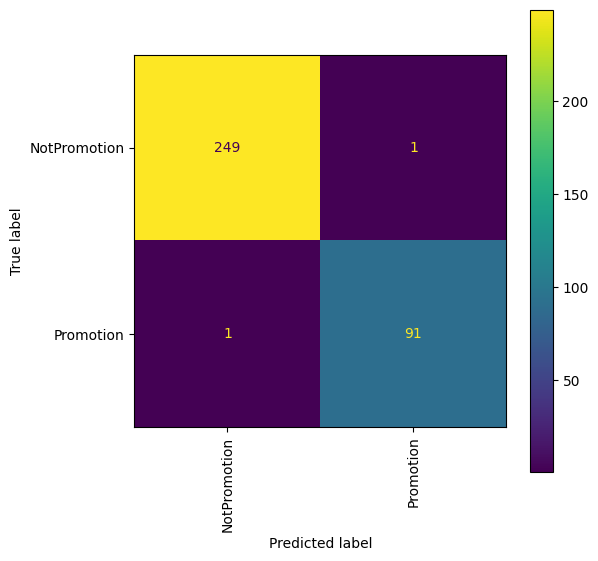

In [91]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
label_type = ['NotPromotion', 'Promotion']

print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"F1 Score: {f1_score(y_pred, y_test)}")
print(f"Recall Score: {recall_score(y_pred, y_test)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, target_names=label_type)}")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels = label_type)

fig, ax = plt.subplots(figsize=(6,6))
print("Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')